In [19]:
SVG_data = read.table("./SVG_data", sep=",",header = TRUE)
source("SVG.r")
iSVG_tab <- get_iSVG(SVG_data, 11, target_np=30, alpha=39, tol.hor=20, last_max=FALSE, cressie=FALSE)

Warning message:
In file(file, "rt"): cannot open file './SVG_data': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


ERROR: Error in get_iSVG(SVG_data, 11, target_np = 30, alpha = 39, tol.hor = 20, : object 'SVG_data' not found


In [23]:
ggplot(iSVG_tab, aes(dist,gamma)) + geom_point(aes())+ theme(aspect.ratio=1)

ERROR: Error in eval(expr, envir, enclos): could not find function "ggplot"


In [1]:
require(gstat)

Loading required package: gstat


Warning message:
In krigeST(PM10 ~ 1, data = rr, newdata = DE_pred, modelList = sumMetricVgm): The spatio-temporal variogram model does not carry a time unit attribute: krisgeST cannot check whether the temporal distance metrics coincide.Warning message:
In xts(matrix(1:nrow(x@time), dimnames = list(NULL, "timeIndex")), : ‘tzone’ setting ignored for Date indexes

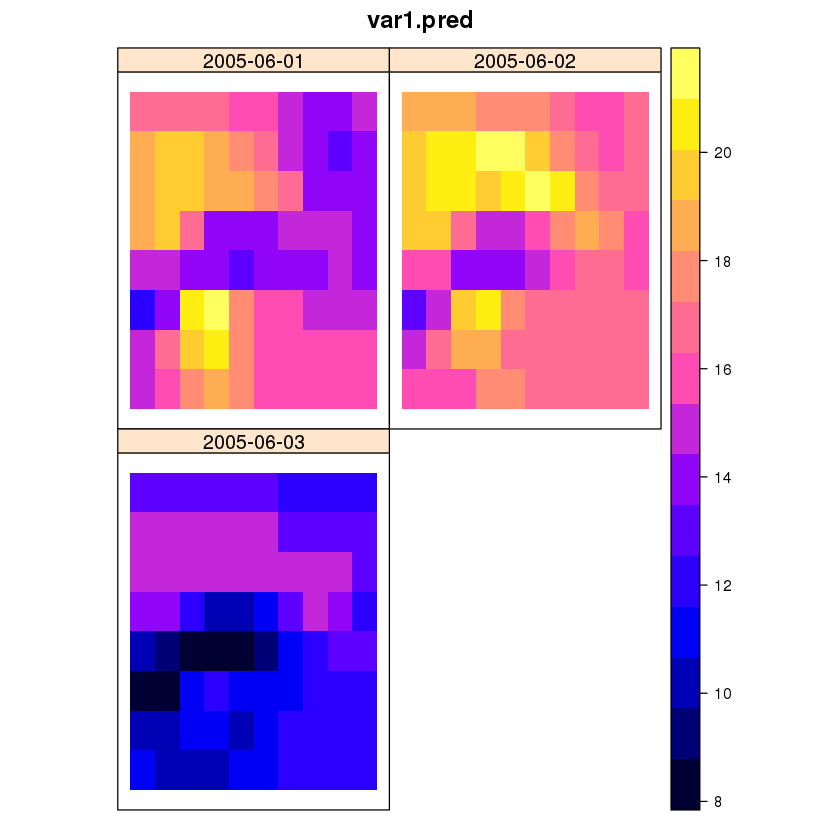

In [3]:
library(sp)
library(spacetime)
sumMetricVgm <- vgmST("sumMetric",
space=vgm( 4.4, "Lin", 196.6, 3),
time =vgm( 2.2, "Lin", 1.1, 2),
joint=vgm(34.6, "Exp", 136.6, 12),
stAni=51.7)
data(air)
if (!exists("rural"))
rural = STFDF(stations, dates, data.frame(PM10 = as.vector(air)))
rr <- rural[,"2005-06-01/2005-06-03"]
rr <- as(rr,"STSDF")
x1 <- seq(from=6,to=15,by=1)
x2 <- seq(from=48,to=55,by=1)
DE_gridded <- SpatialPoints(cbind(rep(x1,length(x2)), rep(x2,each=length(x1))),
proj4string=CRS(proj4string(rr@sp)))
gridded(DE_gridded) <- TRUE
DE_pred <- STF(sp=as(DE_gridded,"SpatialPoints"), time=rr@time)
DE_kriged <- krigeST(PM10~1, data=rr, newdata=DE_pred,
modelList=sumMetricVgm)
gridded(DE_kriged@sp) <- TRUE
stplot(DE_kriged)

In [2]:
library(sp)

data(meuse)
coordinates(meuse) = ~x+y
data(meuse.grid)

In [83]:
x <- seq(from=0,to=70,by=5)
y <- seq(from=0,to=50,by=5)
DE_gridded <- data.frame(cbind(rep(x,length(y)), rep(y,each=length(x))))
gridded(DE_gridded) = ~X1+X2

In [85]:
gridded(DE_gridded) = ~X1+X2

In [86]:
DE_gridded

Object of class SpatialPixels
Grid topology:
   cellcentre.offset cellsize cells.dim
X1                 6        1        10
X2                48        1         8
SpatialPoints:
   X1 X2
1   6 48
2   7 48
3   8 48
4   9 48
5  10 48
6  11 48
7  12 48
8  13 48
9  14 48
10 15 48
11  6 49
12  7 49
13  8 49
14  9 49
15 10 49
16 11 49
17 12 49
18 13 49
19 14 49
20 15 49
21  6 50
22  7 50
23  8 50
24  9 50
25 10 50
26 11 50
27 12 50
28 13 50
29 14 50
30 15 50
31  6 51
32  7 51
33  8 51
34  9 51
35 10 51
36 11 51
37 12 51
38 13 51
39 14 51
40 15 51
41  6 52
42  7 52
43  8 52
44  9 52
45 10 52
46 11 52
47 12 52
48 13 52
49 14 52
50 15 52
51  6 53
52  7 53
53  8 53
54  9 53
55 10 53
56 11 53
57 12 53
58 13 53
59 14 53
60 15 53
61  6 54
62  7 54
63  8 54
64  9 54
65 10 54
66 11 54
67 12 54
68 13 54
69 14 54
70 15 54
71  6 55
72  7 55
73  8 55
74  9 55
75 10 55
76 11 55
77 12 55
78 13 55
79 14 55
80 15 55
Coordinate Reference System (CRS) arguments: NA 

In [4]:
max()

[1] 6

In [11]:
meuse['copper']

ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: unexpected symbol
1: meuse['copper'].max
                   ^


In [65]:
gridded(meuse.grid) = ~x+y
m <- vgm(.59, "Sph", 874, 0)

[using ordinary kriging]


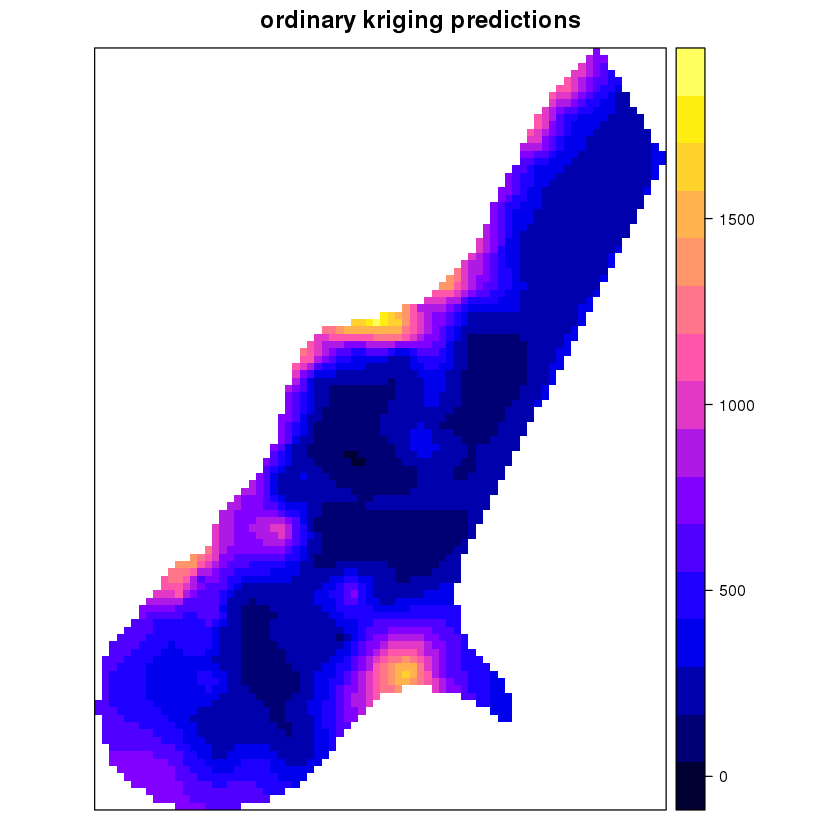

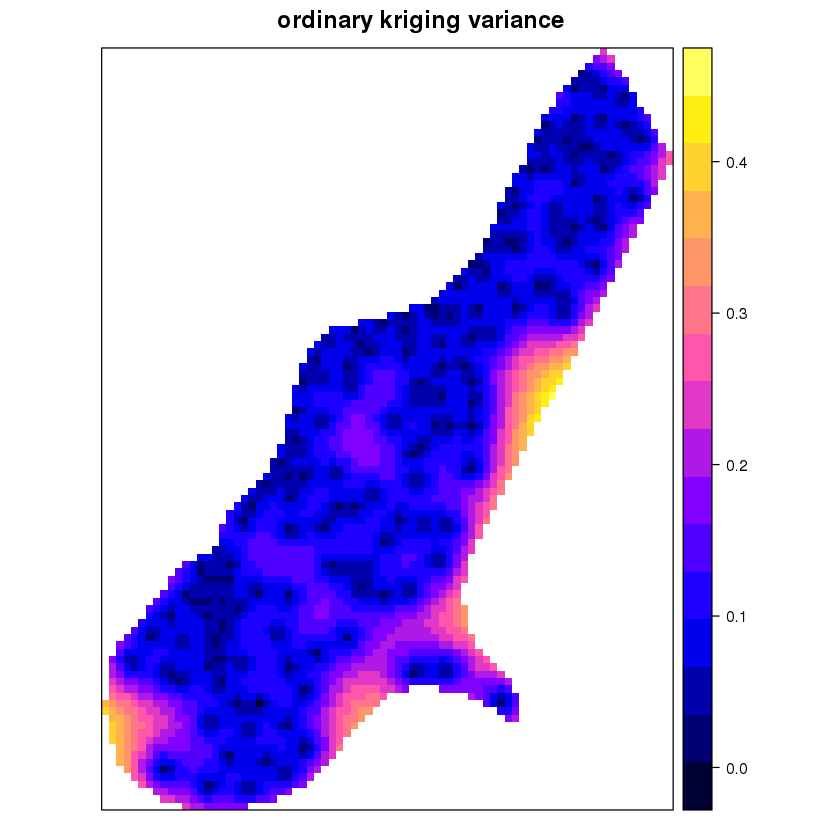

In [66]:
x <- krige(zinc~1, meuse, meuse.grid, model = m)
spplot(x['var1.pred'], main='ordinary kriging predictions')
spplot(x['var1.var'], main='ordinary kriging variance')

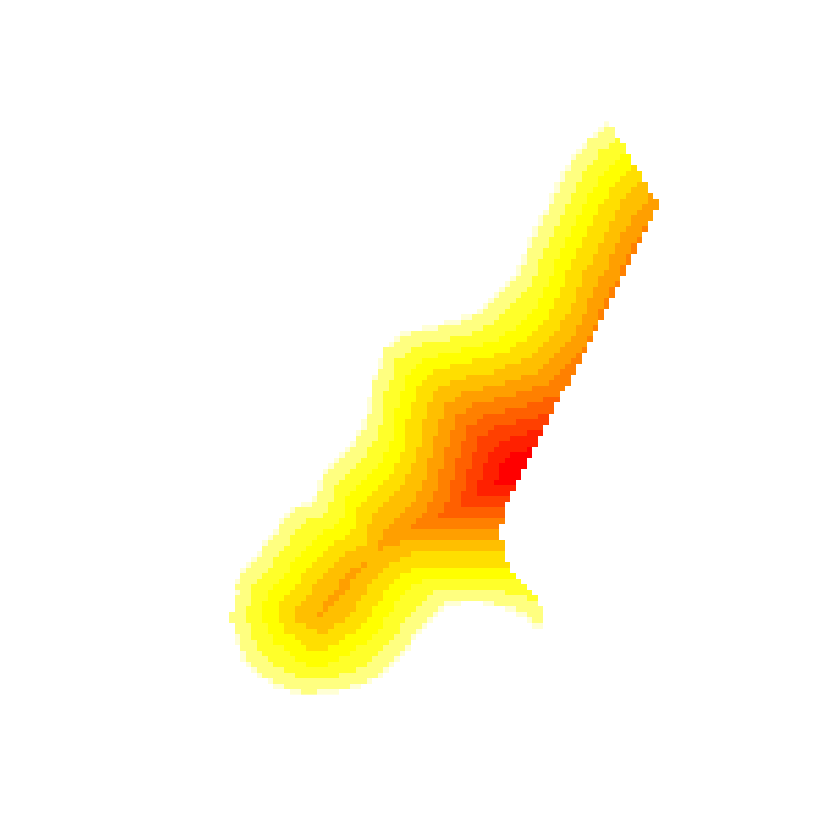

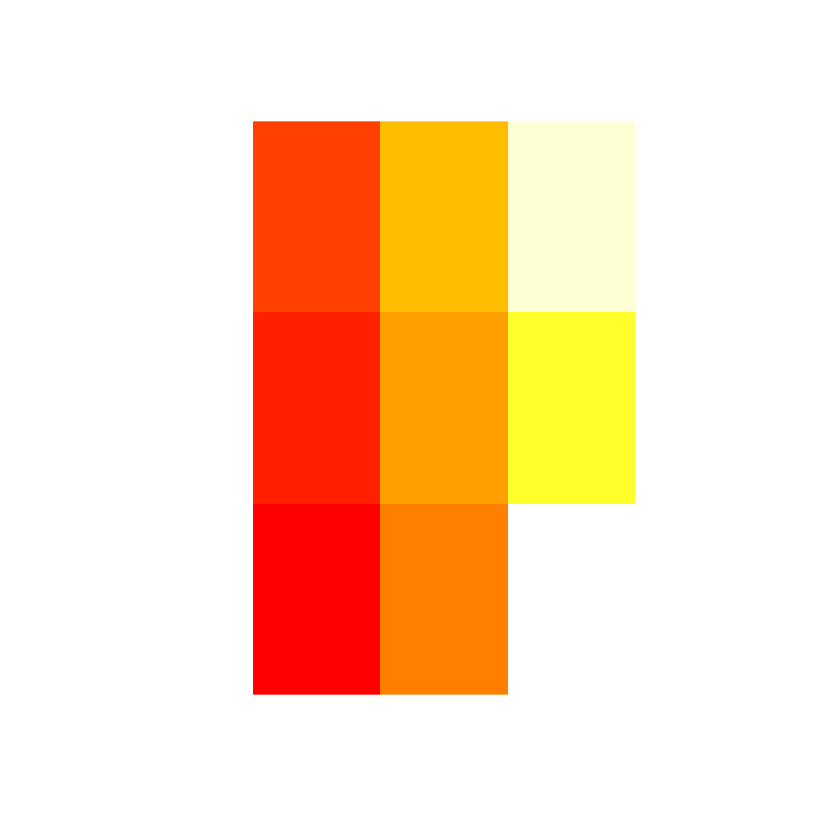

In [92]:
data(meuse.grid) # only the non-missing valued cells
coordinates(meuse.grid) = c("x", "y") # promote to SpatialPointsDataFrame
gridded(meuse.grid) <- TRUE # promote to SpatialPixelsDataFrame
meuse.grid[["idist"]] = 1 - meuse.grid[["dist"]] # assigns new attribute
image(meuse.grid["idist"]) # note the single [
 
# toy example:
df = data.frame(z = c(1:6,NA,8,9),
    xc = c(1,1,1,2,2,2,3,3,3),
    yc = c(rep(c(0, 1.5, 3),3)))
coordinates(df) = ~xc+yc
gridded(df) = TRUE
image(df["z"])

In [89]:
meuse.grid

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: meuse.grid?
   ^


In [96]:
df$z

[1]  1  2  3  4  5  6 NA  8  9

In [101]:
data.frame(x=df$xc, y=df$yc, z=df$z)

,x,y,z
1,1,0,1
2,1,1.5,2
3,1,3,3
4,2,0,4
5,2,1.5,5
6,2,3,6
7,3,0,NA
8,3,1.5,8
9,3,3,9


In [99]:
df$yc

1   2   3   4   5   6   7   8   9 
0.0 1.5 3.0 0.0 1.5 3.0 0.0 1.5 3.0